In [2]:
import pandas as pd
import numpy as np

In [3]:
taste = pd.read_excel('/content/SLR_Tasty_Subhub.xlsx')

In [4]:
taste

,Restaurant,Population Size,Yearly Revenue
0,1,20.8,527.1
1,2,27.5,548.7
2,3,32.3,767.2
3,4,37.2,722.9
4,5,39.6,826.6
5,6,45.1,810.5
6,7,49.9,1040.7
7,8,55.4,1033.6
8,9,61.7,1090.3
9,10,64.6,1235.8


In [5]:
taste.describe()

,Restaurant,Population Size,Yearly Revenue
count,10.00000,10.000000,10.000000
mean,5.50000,43.410000,860.340000
std,3.02765,14.579777,234.699852
min,1.00000,20.800000,527.100000
25%,3.25000,33.525000,733.975000
50%,5.50000,42.350000,818.550000
75%,7.75000,54.025000,1038.925000
max,10.00000,64.600000,1235.800000


In [6]:
taste.duplicated().sum()

np.int64(0)

In [7]:
taste.isnull().sum()

,0
Restaurant,0
Population Size,0
Yearly Revenue,0


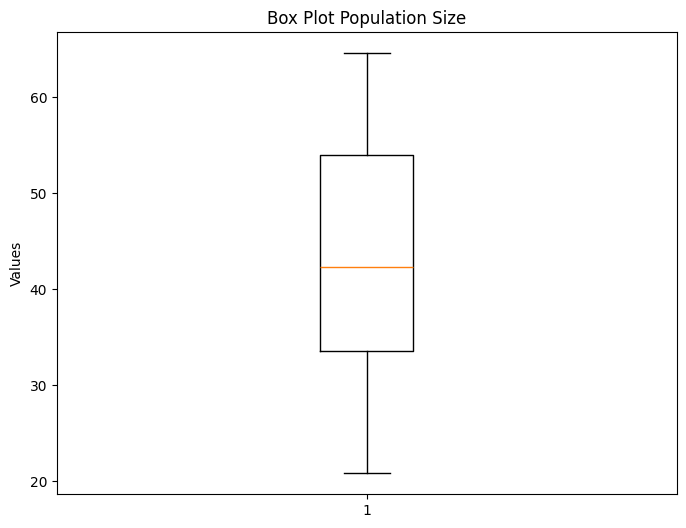

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(taste['Population Size'])  # Replace 'column_name' with an actual column name from your DataFrame
plt.title('Box Plot Population Size')  # Update the title accordingly
plt.ylabel('Values')
plt.show()

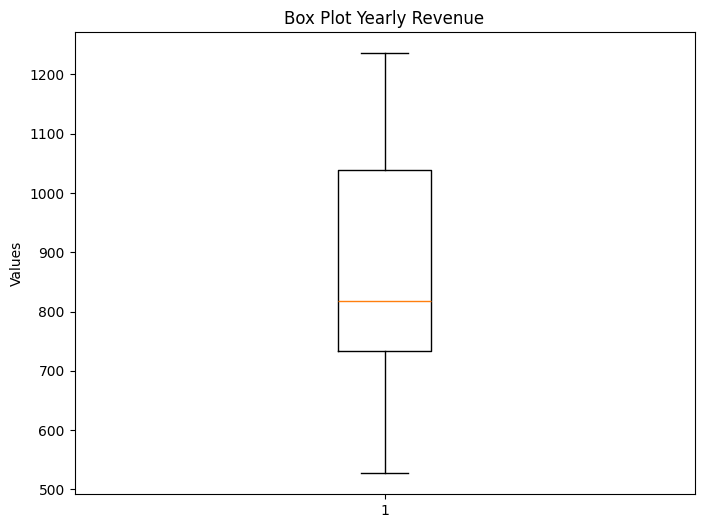

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(taste['Yearly Revenue'])
plt.title('Box Plot Yearly Revenue')
plt.ylabel('Values')
plt.show()

In [11]:
x = taste['Population Size']
y = taste['Yearly Revenue']

In [12]:
x

,Population Size
0,20.8
1,27.5
2,32.3
3,37.2
4,39.6
5,45.1
6,49.9
7,55.4
8,61.7
9,64.6


In [13]:
y

,Yearly Revenue
0,527.1
1,548.7
2,767.2
3,722.9
4,826.6
5,810.5
6,1040.7
7,1033.6
8,1090.3
9,1235.8


In [14]:
import statsmodels.api as sm
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Yearly Revenue   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           4.00e-06
Time:                        13:45:42   Log-Likelihood:                -54.300
No. Observations:                  10   AIC:                             112.6
Df Residuals:                       8   BIC:                             113.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             183.3611     64.290     

In [15]:
# Predict when x = 70
x_new = pd.DataFrame({'const': [1], 'Population Size': [70]}) # Create a DataFrame for prediction
y_pred = model.predict(x_new)
print(f"Predicted Yearly Revenue when Population Size is 70: {y_pred[0]}")

Predicted Yearly Revenue when Population Size is 70: 1275.011039506484


In [16]:
x_new

,const,Population Size
0,1,70


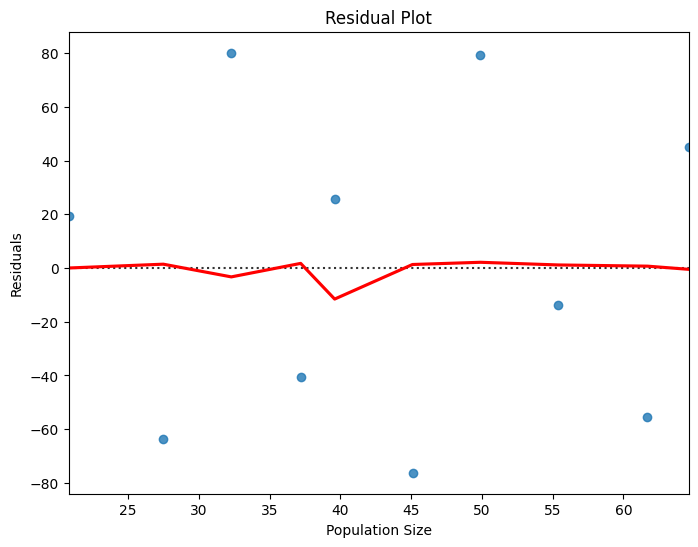

{'Lagrange multiplier statistic': np.float64(0.0026265806254366364), 'p-value': np.float64(0.9591261690178664), 'f-value': np.float64(0.002101816559414946), 'f p-value': np.float64(0.9645570908140211)}
Fail to reject the null hypothesis. Homoscedasticity is assumed.


In [19]:
# plot for homoscadasticity
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

# Check for homoscedasticity using residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x='Population Size', y='Yearly Revenue', data=taste, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Population Size')
plt.ylabel('Residuals')
plt.show()

# Perform Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# Interpretation of Breusch-Pagan test
alpha = 0.05  # Significance level

if bp_test[1] < alpha:
    print("Reject the null hypothesis. Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis. Homoscedasticity is assumed.")

# **This residual plot shows no clear funnel or curve; the residuals are randomly scattered, and the LOWESS line is flat. Hence, we can assume homoscedasticity, though a few outliers are present**

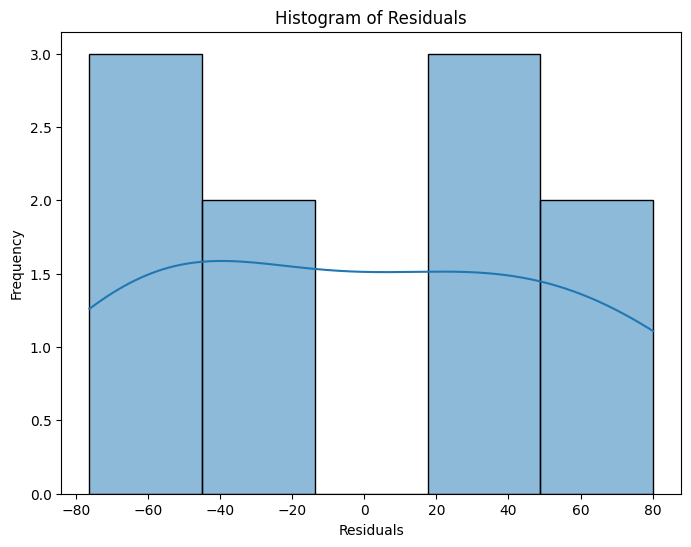

Shapiro-Wilk test statistic: 0.9214218653694137
Shapiro-Wilk test p-value: 0.36896667318666976
Fail to reject the null hypothesis. Residuals are assumed to be normally distributed.


In [20]:
# Check for normality of residuals using histogram and Shapiro-Wilk test
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

residuals = model.resid

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # Use histplot for histogram with KDE curve
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}")
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")

# Interpretation of Shapiro-Wilk test
alpha = 0.05  # Significance level

if shapiro_test.pvalue < alpha:
    print("Reject the null hypothesis. Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis. Residuals are assumed to be normally distributed.")

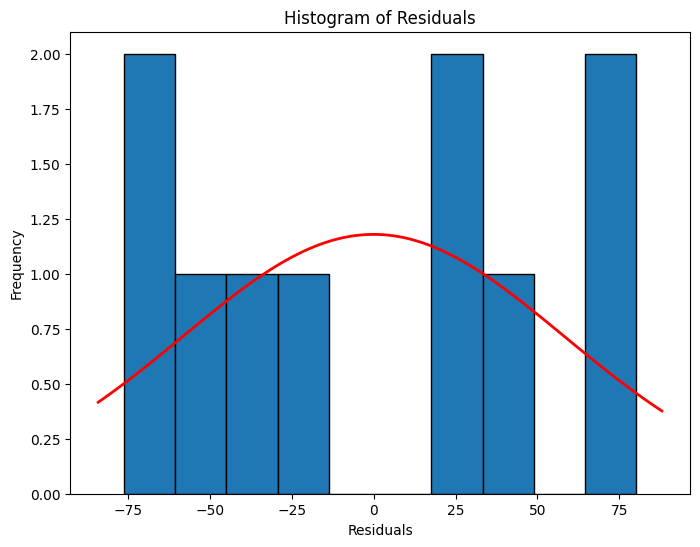

In [21]:
#check whether residuals are normally distributed on histogram with line

residuals = model.resid

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Add a normal distribution curve to the histogram
from scipy.stats import norm
import numpy as np

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p * len(residuals) * (xmax-xmin) / 10, 'r', linewidth=2) #scaled to match the histogram

plt.show()
